# 📊 Linear Regression Deep Dive: From Simple to Multiple  
### *Comparing OLS (Statsmodels) and Scikit-learn, Then Scaling to MLR*  

In [1]:
# Topics outlie

# Comparision between OLS and Scikit-learn

# Multiple linear regression model 

# What is VIF (Variance Inflation Factor)

### 🔹Comparison between two approach  OLS (Ordinary Least Square) vs Scikit-learn (Simple Linear Regression)


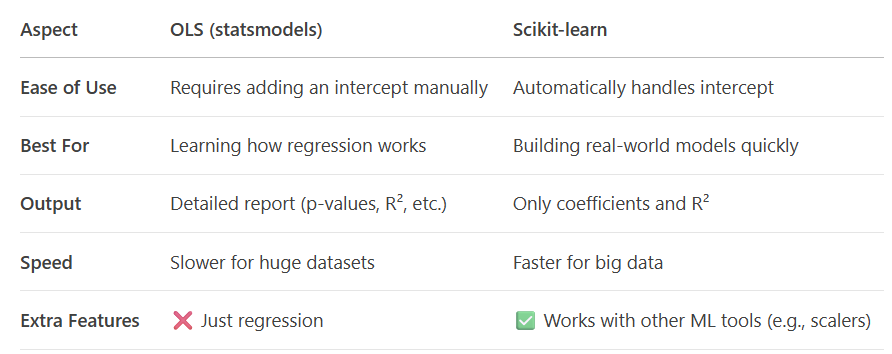

1. OLS (statsmodels)
    - Ease of Use - Requires adding an intercenpt manually
    - Best for - Learning how regression works
    - Output - Detailed report (p-values, R^^2, etc)
    - Speed - Slower for huge datasets.
    - Extra Features - Just Regression

2. Scikit-learn
    - Ease of Use - Automatically handles interdept
    - Best for - Building real-world models quickly
    - Output - Only coefficients are R^^2
    - Speed - Faster for big data.
    - Extra Features - Workds with other ML tools well.


    

# 🔹 Introduction to Multiple Linear Regression (MLR)



In Simple Linear Regression, we had:
> **One input → One output**

Now, in **Multiple Linear Regression**, we move to:
> **Multiple inputs → One output**

---


### 📘 Multiple Linear Regression Equation:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$




- **y**: Target variable (what we want to predict)
- **x₁, x₂, ..., xₙ**: Input features
- **β₀**: Intercept (bias term)
- **β₁ to βₙ**: Coefficients for each feature

---


### 🧠 Real-world Use Cases:

### ➡️ MLR is the natural extension of Simple Linear Regression and

### forms the base of many advanced machine learning models.

- 🎓 **Education**: Predict student performance using:
  - Hours studied
  - Class attendance
  - Prior GPA

- 🏥 **Healthcare**: Predict recovery time using:
  - Age
  - Time to treatment
  - Heart rate






### 🔹 Features

Features are the input variables used to make predictions.

In Multiple Linear Regression, we use two or more features to predict a single target.

🧾 Example:

Hours_Studied, Attendance, and GPA to predict Final_Score

TV, Radio, and Newspaper to predict Sales


### 🔹 Coefficients (β₁, β₂, ..., βₙ)

Each coefficient shows how much that feature contributes to the prediction — holding other features constant.

💡 Example:

If β₁ = 0.45 for Hours_Studied, then for every extra hour studied, 

the final score increases by 0.45 points, assuming all other features remain the same.


### 🔹 Multicollinearity 

When two or more features are highly correlated, they can confuse the model. This is called multicollinearity.

📍 Why it's risky:

The model may give unreliable coefficients

It becomes harder to interpret which feature is really important

🧾 Example:

If both Education_Level and Years_of_Schooling are used, they might convey the same info.

# 📈 ➕ 📉 Multiple Linear Regression Model :- Predicting sales based on advertising on TV, Radio, Newspaper

In [2]:
# import necessary libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [3]:
import pandas as pd
data = pd.read_csv('advertising.csv')
# Display the first few rows of the dataset
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
data.shape

(200, 4)

In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Define the independent variables (X) and the dependent variable (y)

In [7]:

X = data[['TV', 'Radio', 'Newspaper']] # predictors , independent variable

y = data['Sales'] # target variable , dependent variable


In [10]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

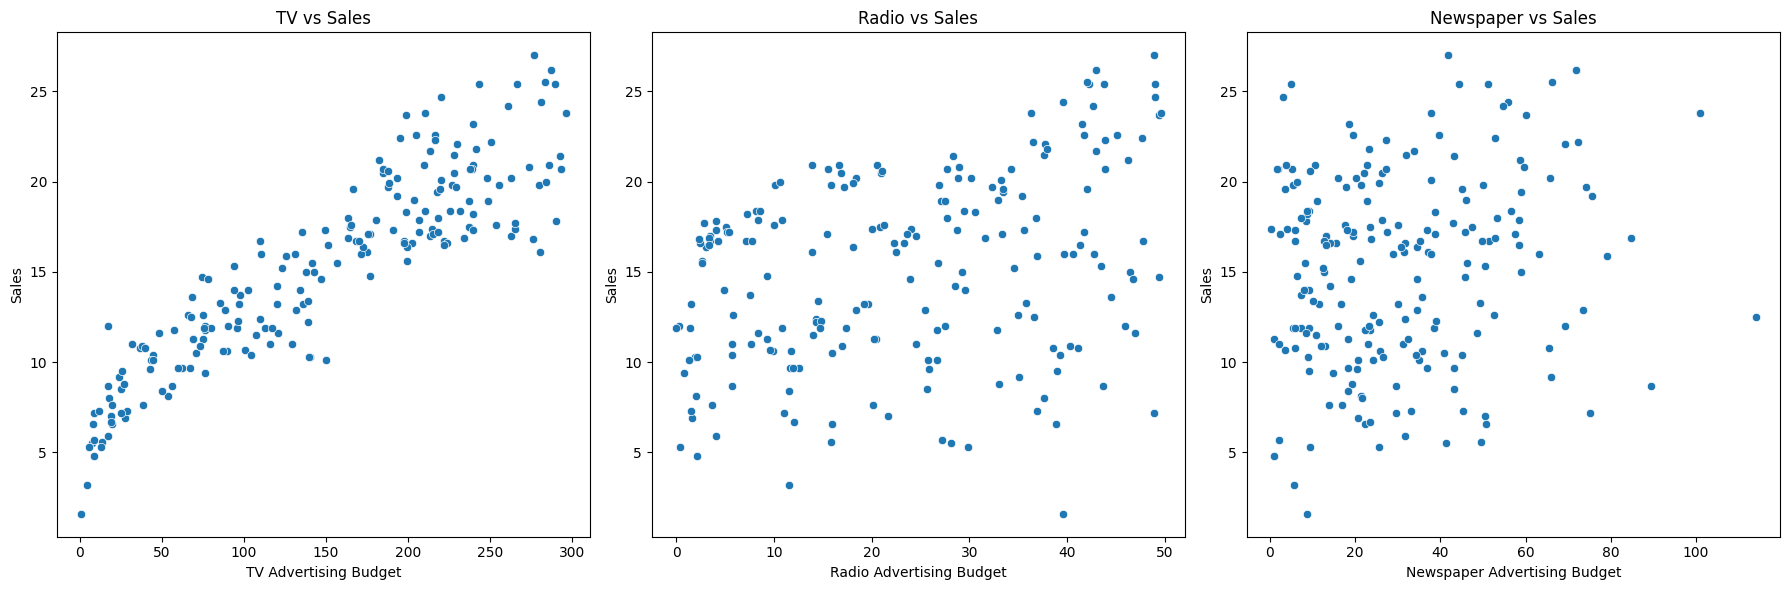

In [12]:
# Plotting scatter plots

plt.figure(figsize=(18, 6))

# Scatter plot for TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['TV'], y=data['Sales'])
plt.title('TV vs Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')

# Scatter plot for Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x=data['Radio'], y=data['Sales'])
plt.title('Radio vs Sales')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')

# Scatter plot for Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x=data['Newspaper'], y=data['Sales'])
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


In [13]:
# What is your inference 

In [14]:
# Which variable is showing strong relation with Sales ?

In [15]:
# Check any of predictor (X) is co-related to another predictors (x)

In [16]:
X.corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


### Compute the correlation matrix

📌 What is Correlation?
Correlation is a statistical measure that describes the strength and direction of a relationship between two numerical variables.

It tells us how one variable changes when another variable changes.

🔍 When is Correlation Used?
To check for linear relationships between two variables.

In data exploration, to identify patterns or relationships among features.

Before building predictive models, to detect multicollinearity (when independent variables are highly correlated).

📊 How to Read a Correlation Matrix?
A correlation matrix displays pairwise correlation coefficients between multiple variables in a table format.

Values range from -1 to +1:

+1 → perfect positive correlation (both increase together)

0 → no linear correlation

–1 → perfect negative correlation (one increases, other decreases)

The matrix is usually symmetric, and the diagonal values are always 1 (correlation of a variable with itself).

Focus on off-diagonal values to study relationships between different variables.

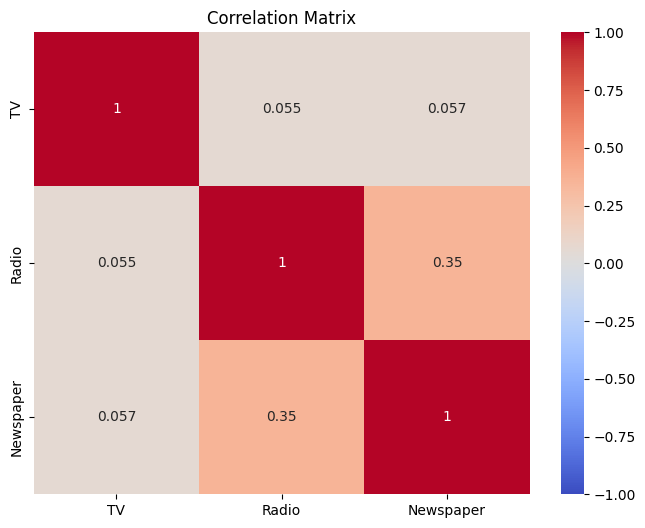

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


In [17]:

correlation_matrix = X.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix
print(correlation_matrix)


### 📘 What is VIF (Variance Inflation Factor)?
VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity among input features.

### 🔍 Why VIF is Important in MLR:

In Multiple Linear Regression, we use multiple features to predict a target.

Sometimes, two or more features are strongly correlated with each other (e.g., Education_Level and Years_of_Schooling).

This creates multicollinearity, which makes it hard for the model to understand which feature is really influencing the output.



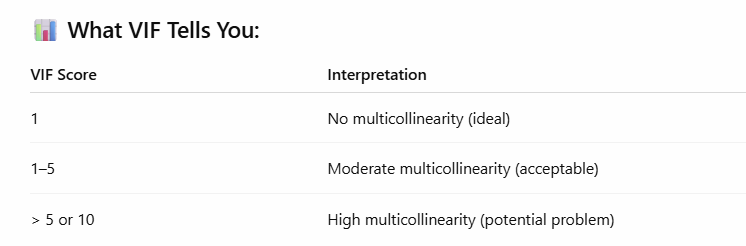

#### What VIF Tells you:

VIF Score:
- 1 - No multicollinearity (ideal)
- 1-5 - Moderate multicollinearity (acceptable)
- > 5 or 10 - High multicollinearity (potential problem)

### 🚨 If You Don’t Use VIF:

Your model might still run, but:

Coefficients will become unstable

You may get wrong signs or values (e.g., β₁ is negative when it should be positive)

Your model might look accurate (high R²) but be misleading



🧠 Simple Analogy:

"VIF is like checking if two ingredients in a recipe are too similar — if they are, you don’t really need both."



In [18]:
X.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each feature
vif_data = pd.DataFrame()
vif_data

""


In [19]:

vif_data["feature"] = X.columns
vif_data

,feature
0,TV
1,Radio
2,Newspaper


In [22]:

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)

Variance Inflation Factors (VIF):
        VIF
0  2.486772
1  3.285462
2  3.055245


### Interpretation of Results:
- Correlation Matrix - Helps to visually inspect pariwise correlations. 
- VIF:
     - VIF = 1: No correlation between the independent variable and the others.
     - 1<VIF<5 : Moderate correlation, usually acceptable.
     - VIF > 5: Potential multicollinearity problem. Some use a threshold of 10.

### What to do if multicollinearity is detected : 
- Remove Variables: Consider removing one of the correlated variables.
- Combine Variables: Combine correlated variables into a single predictor.
- Regularization techniques: Use techniques like Ridge Regression or Lasso Regression to handle multicolllinearity by adding a penalty to the coefficients.

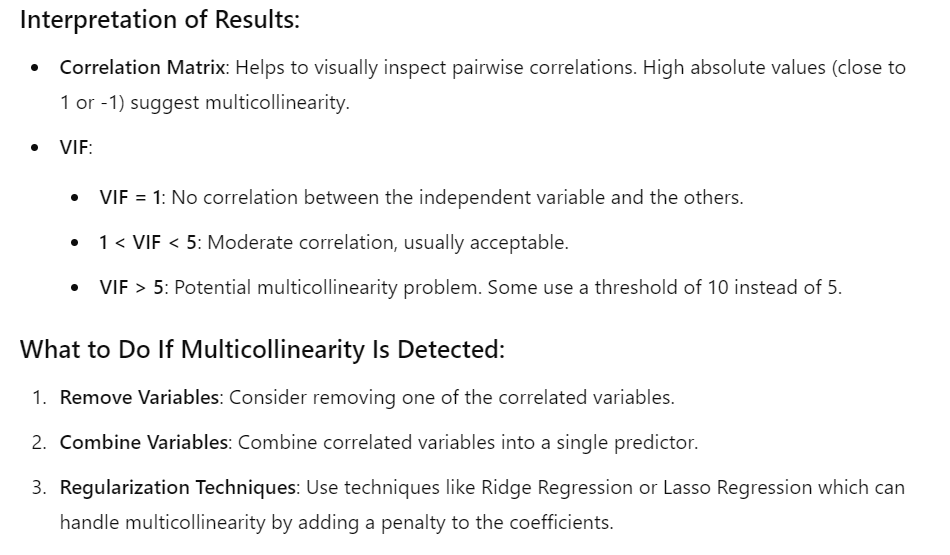

### Split the data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X_train.head()

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [26]:
X_train.shape

(140, 3)

In [27]:
y_train.shape

(140,)

In [28]:
X_test.shape,y_test.shape

((60, 3), (60,))

### Create and train the linear regression model

In [29]:
X_train.head()

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [30]:
y_train.head()

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
Name: Sales, dtype: float64

In [31]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train) 

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Make predictions

In [32]:

y_test_pred = linear_model.predict(X_test)

In [33]:
y_test_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [34]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [35]:
### Create DataFrame for testing data

In [36]:

test_results = pd.DataFrame({
    'Original Sales (Test)': y_test,
    'Predicted Sales (Test)': y_test_pred
})
# Display the first few rows of the testing results
print("Testing Data Results:")
print(test_results.head())


Testing Data Results:
     Original Sales (Test)  Predicted Sales (Test)
95                    16.9               17.159919
15                    22.4               20.533695
30                    21.4               23.689144
158                    7.3                9.519146
128                   24.7               21.607368


### Our model is ready. But is it accurate? 

In [35]:
# summary

# Comparision between OLS and Scikit-learn
# Multiple linear regression model 
# What is VIF (Variance Inflation Factor)

# 📊 Model Evaluation Techniques for Multiple Linear Regression (MLR)

### 🎯 Why Model Evaluation?
Model evaluation helps us measure how well our regression model predicts the target variable.

Even if the model looks good, we need metrics to assess **accuracy**, **error**, and **explanatory power**.



---

## ✅ Common Evaluation Metrics for MLR

---

## 1️⃣ R² Score (Coefficient of Determination)

### 🔍 Concept:
R² tells us what percentage of the variation in the target variable is explained by the model.



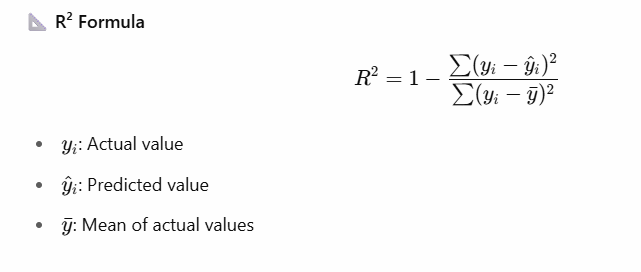

### 🧮 R² Calculation – Example

**Mean of actual values:**

$$
\bar{y} = \frac{10 + 15 + 18}{3} = 14.33
$$

**SS<sub>res</sub> (Sum of Squared Residuals):**

$$
(10 - 12)^2 + (15 - 14)^2 + (18 - 16)^2 = 4 + 1 + 4 = 9
$$

**SS<sub>total</sub> (Total Sum of Squares):**

$$
(10 - 14.33)^2 + (15 - 14.33)^2 + (18 - 14.33)^2 \approx 18.78 + 0.44 + 13.44 = 32.66
$$

**R² Calculation:**

$$
R^2 = 1 - \frac{SS_{res}}{SS_{total}} = 1 - \frac{9}{32.66} \approx 0.7245
$$



### 🧪 Python Code:
```python
from sklearn.metrics import r2_score

actual = [10, 15, 18]
pred = [12, 14, 16]
print("R²:", r2_score(actual, pred))
```

### ✅ Interpretation:
R² = 0.72 → The model explains 72% of the variance in the target variable.

---



## 2️⃣ RMSE (Root Mean Squared Error)


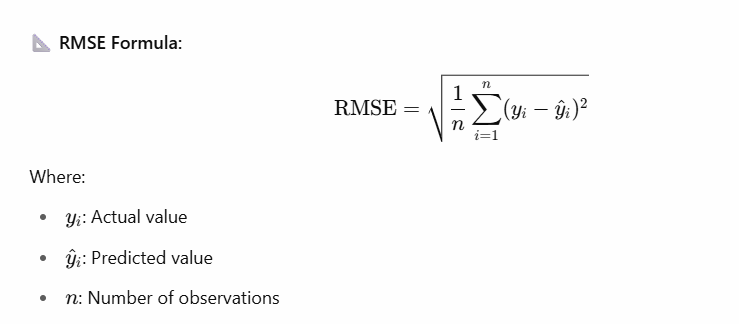

### 📊 Example: RMSE Calculation

Using the same example:

- Actual values: [10, 15, 18]  
- Predicted values: [12, 14, 16]

We already calculated the sum of squared errors:

$$
\text{MSE} = \frac{(10-12)^2 + (15-14)^2 + (18-16)^2}{3} = \frac{9}{3} = 3
$$

Now calculate RMSE:

$$
\text{RMSE} = \sqrt{3} \approx 1.732
$$

---


In [36]:

### 🧪 Python Code


from sklearn.metrics import mean_squared_error
import numpy as np

actual = [10, 15, 18]
pred = [12, 14, 16]

rmse = np.sqrt(mean_squared_error(actual, pred))
print("RMSE:", round(rmse, 3))


RMSE: 1.732


### 📊 Example: MAE (Mean Absolute Error)

Let’s continue with the same example:

- Actual values: [10, 15, 18]  
- Predicted values: [12, 14, 16]

Calculate absolute errors:
- |10 − 12| = 2  
- |15 − 14| = 1  
- |18 − 16| = 2

Now compute MAE:

$$
\text{MAE} = \frac{2 + 1 + 2}{3} = \frac{5}{3} \approx 1.67
$$




In [37]:
### 🧪 Python Code


from sklearn.metrics import mean_absolute_error

actual = [10, 15, 18]
pred = [12, 14, 16]

mae = mean_absolute_error(actual, pred)
print("MAE:", round(mae, 2))


MAE: 1.67


✅ Interpretation
MAE ≈ 1.67
→ On average, predictions are 1.67 units off from actual values.

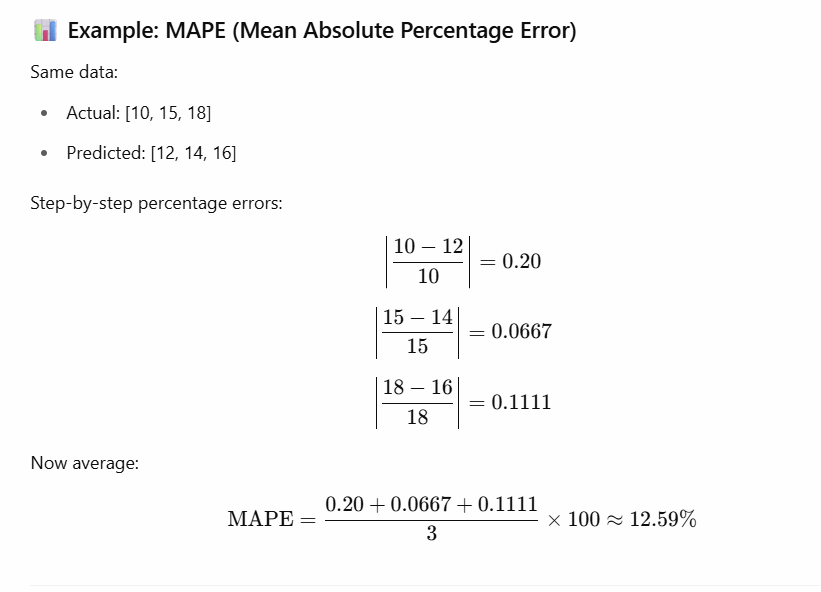

In [38]:

### 🧪 Python Code:

actual = np.array([10, 15, 18])
pred = np.array([12, 14, 16])

mape = np.mean(np.abs((actual - pred) / actual)) * 100
print("MAPE:", round(mape, 2), "%")




MAPE: 12.59 %


In [39]:
### ✅ Interpretation:
### MAPE ≈ 12.59% → Predictions are off by 12.59% on average.



## 🧾 Summary Table
| Metric | What it Measures          | Ideal Value | Use Case |
|--------|----------------------------|-------------|----------|
| R²     | % variance explained       | Closer to 1 | Model fit quality |
| RMSE   | Average squared error      | Closer to 0 | Penalizes large errors |
| MAE    | Average absolute error     | Closer to 0 | Simpler error interpretation |
| MAPE   | Avg % error from actuals   | Lower %     | Explaining % error to audience |

---

## ✅ Final Notes:
- Always evaluate the model on **test data**
- Use **multiple metrics** to get a complete picture
- RMSE penalizes large errors more; MAE is easier to explain
- R² shows explanatory power, not accuracy

Use these metrics to select and justify your regression model before making business decisions or deployment.


### Evaluate the model

In [40]:


mse_test = mean_squared_error(y_test, y_test_pred)

r2_test = r2_score(y_test, y_test_pred)

print(f'Multiple Linear Regression - Testing MSE: {mse_test}, Testing R2: {r2_test}')


Multiple Linear Regression - Testing MSE: 2.5416240362291487, Testing R2: 0.9091484341849799


### 🎓 What is a Residual Plot?
A residual is the difference between the actual value and the predicted value:



### 📐 Residual Formula

$$
\text{Residual} = y_{\text{actual}} - y_{\text{predicted}}
$$

A residual plot is a graph that shows:

x-axis → predicted values

y-axis → residuals (errors)


### ✅ What Does a Good Residual Plot Look Like?

Residuals should be randomly scattered around the horizontal line at 0.

No clear pattern should be visible.

This means: your model’s errors are evenly distributed → a sign of a good fit.



### 🚨 Why It’s Important
If your residuals do not look random:

🔁 You may have missed a pattern in the data.

📈 If residuals increase/decrease systematically, it may mean:

You're missing a nonlinear relationship.

Your model may be underfitting or overfitting.



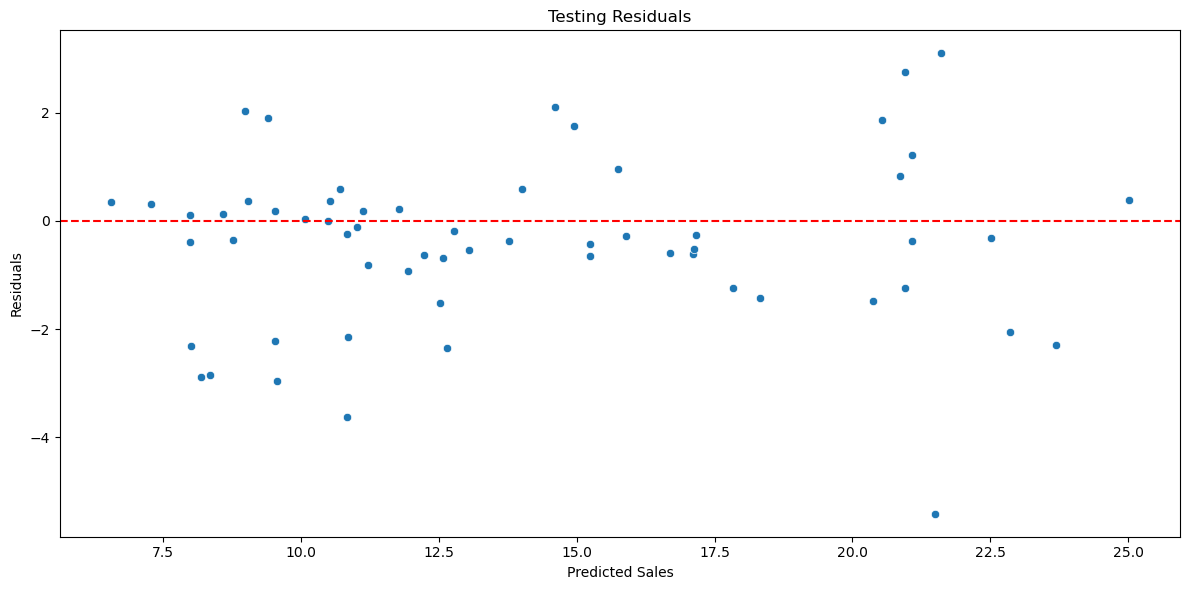

In [41]:
# Residuals

residuals_test = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)

sns.scatterplot(x=y_test_pred, y=residuals_test)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Testing Residuals')

plt.tight_layout()
plt.show()


In [42]:
# inference 

# There is no clear pattern around line , and residual are randomly scattered.

### 📉 If Residuals Show a Systematic Pattern...

🔍 What It Indicates:

A clear curve, slope, or funnel shape in the residuals means your model is 

violating key assumptions of linear regression — especially linearity and homoscedasticity (constant variance).

This usually points to:

A nonlinear relationship that linear regression can’t capture

Missing variables or interactions in the model

Possible underfitting

### 🛠️ What You Can Do to Fix It

### 1. ✅ Add Polynomial Terms

If the residuals follow a curved pattern (U-shape or inverted U), it means the relationship is nonlinear.

📌 Fix: Try a Polynomial Regression model



In [43]:

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline

# poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# poly_model.fit(X_train, y_train)

### 2. ✅ Apply Feature Transformation

If residuals increase or decrease systematically, apply transformations like:

Log or sqrt for right-skewed variables

Box-Cox for automatic transformation (scipy)

📌 Fix: Example using log transformation

In [44]:
#df['TV_Radio'] = df['TV'] * df['Radio']

### 3. ✅ Add Missing Features or Interaction Terms

Sometimes the model misses important variables or their interactions.

📌 Fix: Add interaction manually

### 4. ✅ Use a More Flexible Model

If linear regression is still struggling:

Try Decision Trees, Random Forests, or Gradient Boosting

These handle nonlinearities and interactions automatically

In [45]:
#df['log_variable'] = np.log(df['original_variable'] + 1)


### Note

If your residuals show a curved pattern or increase with predictions, your model is likely missing something.

You can fix this by adding polynomial terms, transforming variables, or switching to a nonlinear model.

Residual plots aren’t just diagnostic — they guide how to improve the model.



### 🎯 If Residuals Suggest Underfitting or Overfitting

Here’s how to detect and fix each:

### 🔻 Underfitting

Clues:

Residuals show clear pattern (e.g., curve, slope)

R² is low on both training and test sets

Model is too simple to capture true data structure

Common Causes:

Using only linear terms when the relationship is nonlinear

Leaving out important features

Remedies:

✅ Add polynomial features (e.g., degree 2 or 3)

✅ Include interaction terms

✅ Apply log/sqrt transformations

✅ Switch to a more complex model (e.g., decision tree)

### 🔺 Overfitting

Clues:

Residuals look random on training data, but prediction errors are high on test data

High R² on training, low R² on test

Too many predictors or overly complex model

Common Causes:

Model memorizes noise instead of generalizing patterns

Remedies:

✅ Simplify the model (remove unnecessary features)

✅ Use regularization: Ridge or Lasso regression

✅ Apply cross-validation to detect overfitting early

✅ Gather more data if possible



In [46]:
# display statistics of model , p value for each feature and share your inference.

In [47]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train)

# Fit the OLS model with intercept
ols_model = sm.OLS(y_train, X_train_const).fit()

# Print the summary to get p-values
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     374.3
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           1.69e-65
Time:                        12:58:07   Log-Likelihood:                -271.70
No. Observations:                 140   AIC:                             551.4
Df Residuals:                     136   BIC:                             563.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7438      0.400     11.863      0.0

In [48]:
# Quiz : - What is your inference about p value for each feature ?

### After removing newspaper from dataset, since its p value is not significant.

In [49]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data1 = pd.read_csv('advertising.csv')

# Display the first few rows of the dataset
print(data1.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [51]:

# Define the independent variables (X) and the dependent variable (y)
X1 = data1[['TV', 'Radio']]
y1 = data1['Sales']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [52]:
X_train1

,TV,Radio
79,116.0,7.7
197,177.0,9.3
38,43.1,26.7
24,62.3,12.6
122,224.0,2.4
...,...,...
106,25.0,11.0
14,204.1,32.9
92,217.7,33.5
179,165.6,10.0


In [53]:

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train1, y_train1)


LinearRegression()

In [54]:

# Make predictions
y_test_pred1 = linear_model.predict(X_test1)


In [55]:

# Evaluate the model

mse_test1 = mean_squared_error(y_test1, y_test_pred1)
r2_test1 = r2_score(y_test1, y_test_pred1)


print(f'Multiple Linear Regression - Testing MSE: {mse_test1}, Testing R2: {r2_test1}')


Multiple Linear Regression - Testing MSE: 2.8466161221315405, Testing R2: 0.9078797802624651


In [56]:
import statsmodels.api as sm
# Add a constant to the model (intercept)
X_train_const1 = sm.add_constant(X_train1)

# Fit the OLS model with intercept
ols_model1 = sm.OLS(y_train1, X_train_const1).fit()

# Print the summary to get p-values
print(ols_model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     705.7
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           3.43e-79
Time:                        12:58:07   Log-Likelihood:                -305.98
No. Observations:                 160   AIC:                             618.0
Df Residuals:                     157   BIC:                             627.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7914      0.328     14.606      0.0

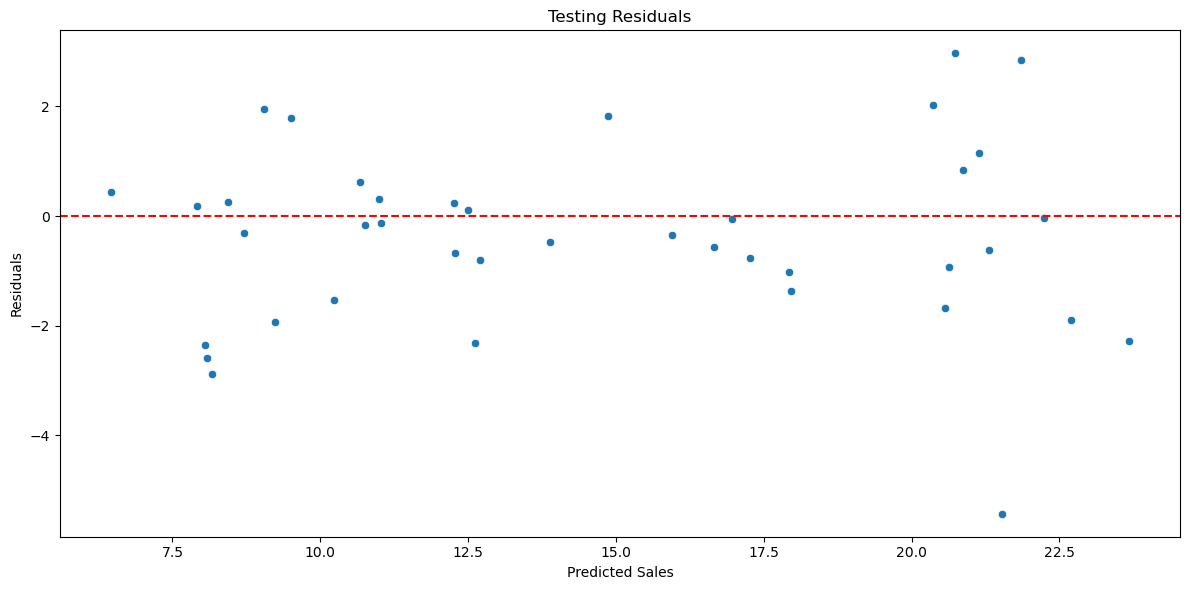

In [57]:
# Residuals

residuals_test1 = y_test1 - y_test_pred1

# Plot residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)

sns.scatterplot(x=y_test_pred1, y=residuals_test1)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Testing Residuals')

plt.tight_layout()
plt.show()
